# **Ex1 - Unsupervised learning**

## Names and IDs

1.   212112106, Abed Shogan
2.   209969245, Noam Shani

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [87]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [88]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# load the data
# Provide the path to your Excel file
path = 'C:\\Users\\user\\Dropbox\\Semester E\\Machine Learning\\HW\\HW1_ML\\customer_segmentation.csv'
# # Load data into a DataFrame
data_frame = pd.read_csv(path)
# Get the size of the DataFrame
rows, columns = data_frame.shape

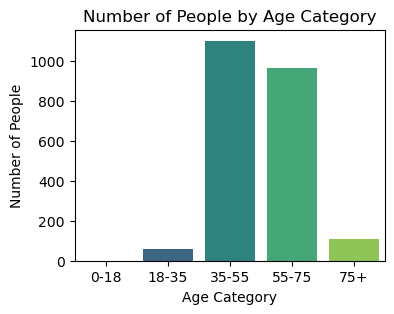

In [89]:

current_year = 2024
data_frame['age'] = current_year - data_frame['Year_Birth']

    # Define age categories
bins = [0, 18, 35, 55, 75, data_frame['age'].max()]
labels = ['0-18', '18-35', '35-55', '55-75', '75+']

    # Add a new column for age category
data_frame['age_category'] = pd.cut(data_frame['age'], bins=bins, labels=labels, right=False)

    # Create a bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x='age_category', data=data_frame, palette='viridis')
plt.title('Number of People by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.show()

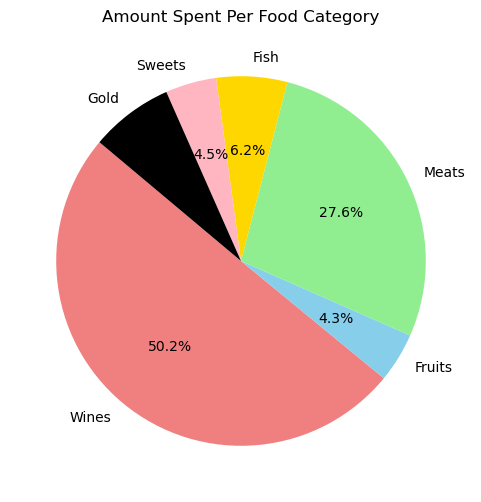

In [90]:
# Graph 2 -     #Sum the amounts for each food category across all customers
category_totals = data_frame[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum()

#dictionary to map original category names to custom labels
category_labels = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntFishProducts': 'Fish',
    'MntMeatProducts': 'Meats',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
    }

    #Map original category names to my labels
custom_labels = [category_labels.get(category, category) for category in category_totals.index]

    # Plot a pie chart with custom labels
plt.figure(figsize=(6, 6))
plt.pie(category_totals, labels=custom_labels, autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'skyblue', 'lightgreen', 'gold', 'lightpink','black'])
plt.title('Amount Spent Per Food Category')
plt.show()


**Insight** -  Graph 1 plots the Number of members for each Age Category from Underage members to Middle Aged to Elderly. 
The Insight we can take from Graph 1 is that most Customers are between the Ages of 35 and 75, We have Some elderly over the age of 75 and some who are young (18 to 35) We Also do not have under age Customers.

**Insight** - Graph 2 is a Pie Chart that displays the ratio of each category of products where customers spend money
In Graph 2  we can understand that the most amount of money spent by customers is on Wines, Above 50% of all spendings!, After that comes in Meat products and lastly are Fish Products, which customers spend the least on.
We can see the Distributions of Ratios in This Pie Chart.

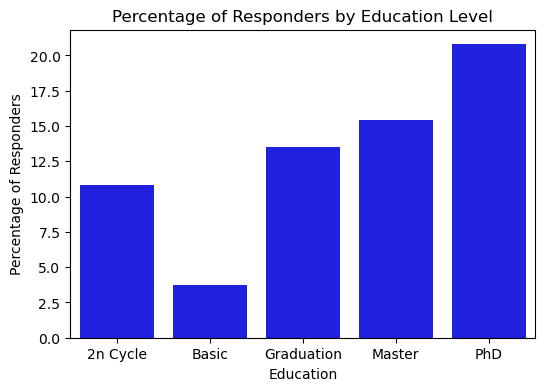

In [91]:
# Graph 3 -      # Group the data by education level and calculate the counts of responders and non-responders
education_counts = data_frame.groupby(['Education', 'Response']).size().unstack().fillna(0)

# Calculate percentage of responders for each education category
education_counts['Percentage'] = (education_counts[1] / education_counts.sum(axis=1)) * 100

# Plot a bar chart with percentage for responders only
plt.figure(figsize=(6, 4))
sns.barplot(x='Education', y='Percentage', data=education_counts.reset_index(), color='blue')
plt.title('Percentage of Responders by Education Level')
plt.xlabel('Education')
plt.ylabel('Percentage of Responders')
plt.show()

**Insight** - Graph 3:  This Graph Plots The Percentage of Responders per Education Level Category using the Bar Plot Format.
We can perceive from Graph 3 that there is a positive correaltion between Education level and Response Rate in our customers dataset. with Phd Members being most likely to respond to Basic Education members least liely (momentary break of trend where basic is less than 2n cycle).

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [166]:
# load the data
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# To Fix Memory Leak when Using K Means
import os
# Provide the path to your Excel file
path = 'C:\\Users\\user\\Dropbox\\Semester E\\Machine Learning\\HW\\HW1_ML\\customer_segmentation.csv'
# # Load data into a DataFrame
df = pd.read_csv(path)
# Get the size of the DataFrame
rows, columns = df.shape


In [167]:
# Scale the data using MinMaxScaler, 
rows, columns = df.shape
    # Scale the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
    # fit and transform the data
numerical_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumStorePurchases', 'NumWebVisitsMonth']
    #13
categorical_columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4',
                           'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
                           'Response']
other_columns = ['ID','Dt_Customer']

other_data = df[other_columns]
numerical_data = df[numerical_columns]
categorical_data = df[categorical_columns]

scaled_numerical_data = pd.DataFrame(min_max_scaler.fit_transform(numerical_data), columns=numerical_data.columns)

    # Concatenate the scaled numerical data with the non-numerical data
scaled_df = pd.concat([other_data, scaled_numerical_data], axis=1)


    # Encode categorical variables
encoder = OneHotEncoder()
    # 13
categorical_columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4',
                           'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
                           'Response']
    # Fit and transform the categorical data
encoded_categorical_data = encoder.fit_transform(categorical_data).toarray()

    # Get the feature names
categories = [f"{col}_{category}" for col, cats in zip(categorical_data.columns, encoder.categories_) for category in cats]


feature_names_array = np.array(encoder.categories_, dtype=object).ravel()

    # Create a DataFrame with the one-hot encoded features and feature names
encoded_df = pd.DataFrame(encoded_categorical_data, columns=categories)

    # Concatenate the encoded categorical variables with the scaled data
final_data = pd.concat([scaled_df, encoded_df], axis=1)

We Can see we have 5 Clusters here, showing where each product lands in relation to Meats and Wines.


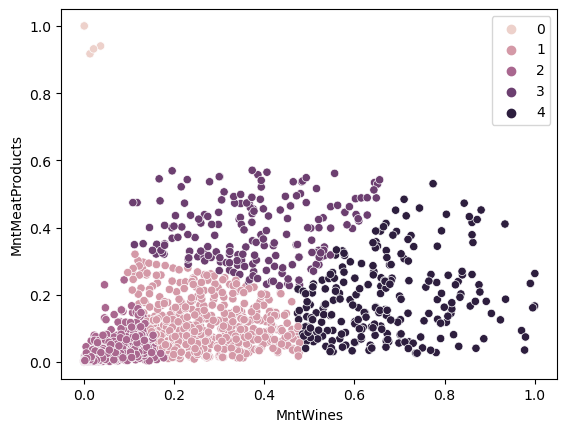

In [168]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
wines_products_cols = ['MntWines', 'MntMeatProducts']
extracted_data_set = final_data[wines_products_cols]
res = KMeans(n_clusters = 5, random_state = 0,n_init = 1)
res.fit(extracted_data_set)
# Visualize the clusters
sns.scatterplot(data = extracted_data_set, x = 'MntWines', y = 'MntMeatProducts', hue = res.labels_)
print("We Can see we have 5 Clusters here, showing where each product lands in relation to Meats and Wines.")

### Elbow

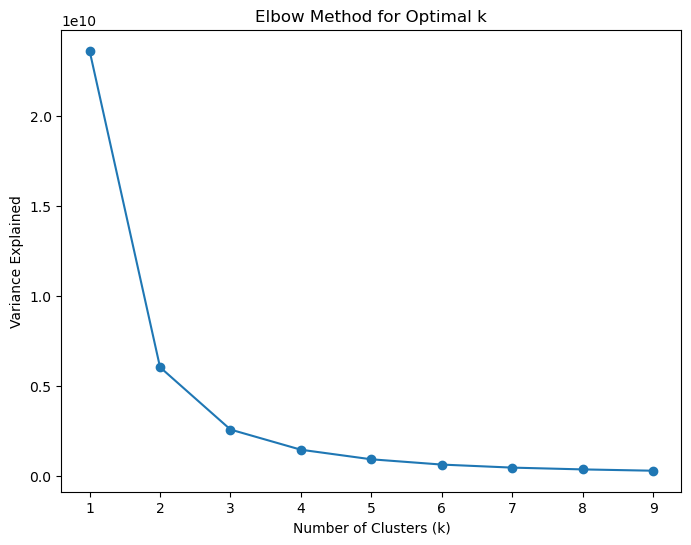

Optimal k using Elbow Method for KMeans: 2


In [169]:
# Define the number of clusters to test (you can choose a range)
k_vals = range(1, 10)
df_copy = final_data.copy()
df_copy.fillna(0, inplace=True)
df_copy_no_date = df_copy.drop(columns=['Dt_Customer'])
df_no_id_no_date = df_copy_no_date.drop(columns=['ID'])
# Initialize an empty list to store the variance explained for each k
variance_per_k = []

# Fit KMeans with different values of k and calculate variance explained
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
    kmeans.fit(df_copy_no_date)
    variance_per_k.append(kmeans.inertia_)  # kmeans.inertia_ gives the variance explained by the model

    # Determine the optimal k based on the elbow in the plot
optimal_k_kmeans_elbow = np.argmin(np.diff(variance_per_k)) + 2  # Add 2 because the index starts from 0


plt.figure(figsize=(8, 6))
plt.plot(k_vals, variance_per_k, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance Explained')
# # Show the plot
plt.show()

# Print the optimal k for KMeans using Elbow Method
print(f"Optimal k using Elbow Method for KMeans: {optimal_k_kmeans_elbow}")

#The optimal k we got by using Elbow Method is k=2, because it is where the inertia starts to slow down. 



### Silhouette Score

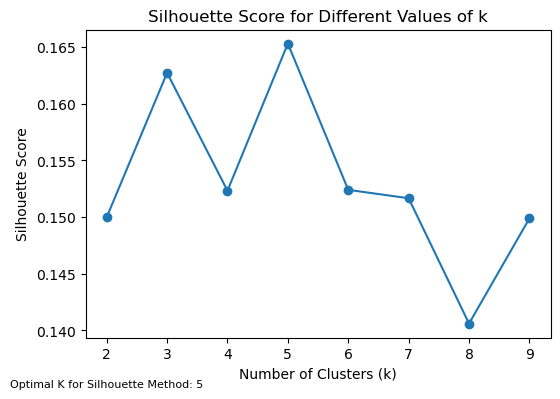

We Can see The Optimal K for Silhouette is 5 and for the Elbow is K=2, Thus we have 2 different answers. We Should follow the Silhouette Because It is More Accurate. 


In [170]:
# Specify the range of clusters (k) to try
k_values = range(2, 10)

# List to store silhouette scores for each k
silhouette_scores = []
df_no_id_no_date_copy1 = df_no_id_no_date.copy()
# Iterate over different values of k
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=0,n_init = 10)

    # Fit the model and obtain cluster labels
    cluster_labels = kmeans.fit_predict(df_no_id_no_date_copy1)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_no_id_no_date_copy1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Find the index of the maximum silhouette score
best_k_index = np.argmax(silhouette_scores)
best_k = k_values[best_k_index]
# Plot the silhouette scores for each k
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.text(2, 0.135, f'Optimal K for Silhouette Method: {best_k}', fontsize=8, ha='center')
plt.show()
print("We Can see The Optimal K for Silhouette is 5 and for the Elbow is K=2, Thus we have 2 different answers. We Should follow the Silhouette Because It is More Accurate. ")

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





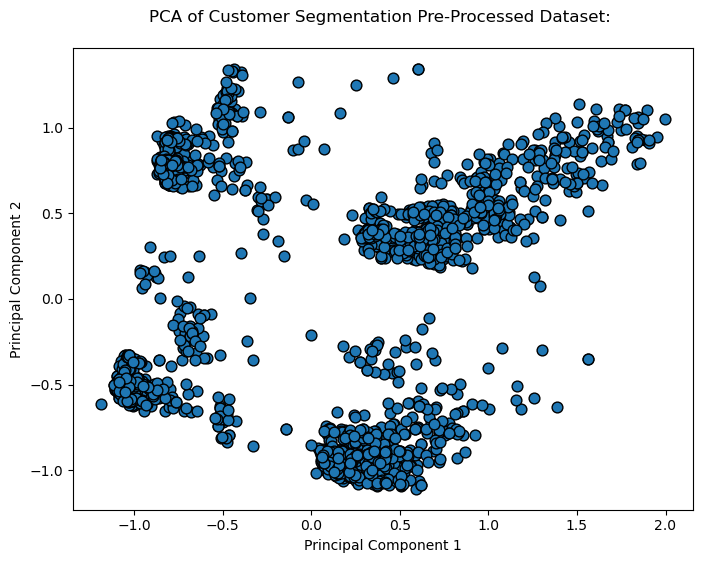

In [171]:
# Adjust n_components as needed

df_no_date_copy2 = df_copy_no_date.copy()
df_no_date__no_id = df_no_date_copy2.copy().drop(columns=['ID'])
n_components = 2
# #scale ID too so it wont mess up our pca

# Create a DataFrame with the principal components
pca = PCA(n_components)
pca_df = pca.fit_transform(df_no_date__no_id)


# Plotting the PCA
# Step 2: Visualize the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], edgecolor='k', s=60)
plt.title('PCA of Customer Segmentation Pre-Processed Dataset: \n')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [172]:
# Step 3: Find the variance explained in this PCA
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)

# Display explained variance
print(f"Variance explained by PC1: {explained_variance_ratio[0]*100:.2f}%")
print(f"Variance explained by PC2: {explained_variance_ratio[1]*100:.2f}%")
print(f"Total variance explained by both components: {total_variance_explained*100:.2f}%")

Variance explained by PC1: 16.15%
Variance explained by PC2: 14.73%
Total variance explained by both components: 30.88%


**Q**: What is the variance explained in the 2 component PCA?

**A**: The Variance Explained by this 2 component PCA means that PC1 is responsible for 16.15% of the TOTAL variance observed in the data samples, while PC2 is responsible for the remaining 14.73%.
However, these 2 components explain only 30.88% of the total variance in the data.

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [173]:
# Adjust n_components as needed
df_no_date_copy2 = df_copy_no_date.copy()
df_no_date__no_id = df_no_date_copy2.copy().drop(columns=['ID'])
n_components_pca = 2

# Create a DataFrame with the principal components
pca = PCA(n_components_pca)
pca_result = pca.fit_transform(df_no_date__no_id)

# Apply PCA with n_components=2
pca_kmeans = PCA(n_components=2)
pca_result_kmeans = pca_kmeans.fit_transform(df_no_date__no_id)

# Create a DataFrame with the principal components
pca_df_kmeans = pd.DataFrame(data=pca_result_kmeans, columns=['PC1', 'PC2'])

# Normalize PCA data to have values between 0 and 1
scaler_kmeans = MinMaxScaler()
pca_df_normalized_kmeans = pd.DataFrame(scaler_kmeans.fit_transform(pca_df_kmeans), columns=['PC1', 'PC2'])

### Elbow

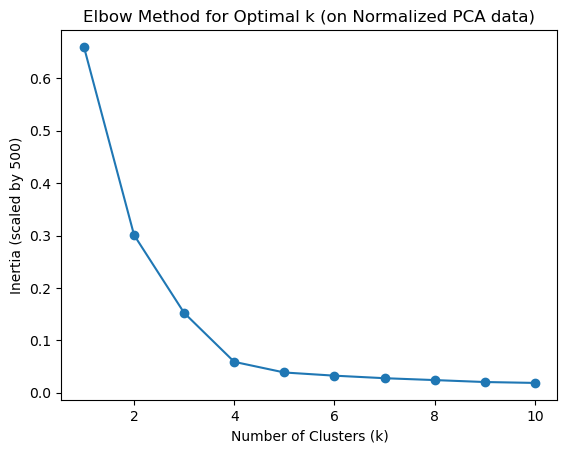

Optimal k using Elbow Method for KMeans: 2


In [174]:
# Find the best k using the elbow method with normalized data
k_values_kmeans = range(1, 11)
inertia_values_kmeans = []

for k_kmeans in k_values_kmeans:
    kmeans_kmeans = KMeans(n_clusters=k_kmeans, random_state=0)
    kmeans_kmeans.fit(pca_df_normalized_kmeans)
    inertia_values_kmeans.append(kmeans_kmeans.inertia_)

inertia_values_kmeans = np.array(inertia_values_kmeans) / 500

# Plot the elbow curve
plt.plot(k_values_kmeans, inertia_values_kmeans, marker='o')
plt.title('Elbow Method for Optimal k (on Normalized PCA data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (scaled by 500)')
plt.show()

# Determine the optimal k based on the elbow in the plot
optimal_k_kmeans_elbow = np.argmin(np.diff(inertia_values_kmeans)) + 2  # Add 2 because the index starts from 0

# Print the optimal k for KMeans using Elbow Method
print(f"Optimal k using Elbow Method for KMeans: {optimal_k_kmeans_elbow}")

#The optimal k we got by using Elbow Method is k=2, because it is where the inertia starts to slow down. 
#It is important to note that the "elbow" is between 2<k<4, 
#but we chose k=2 because it's where the "elbow" begins.

### Silhouette

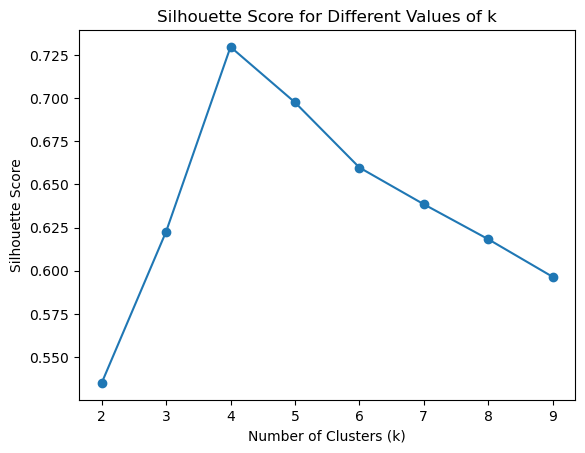

Optimal k using Silhouette Method for KMeans: 4


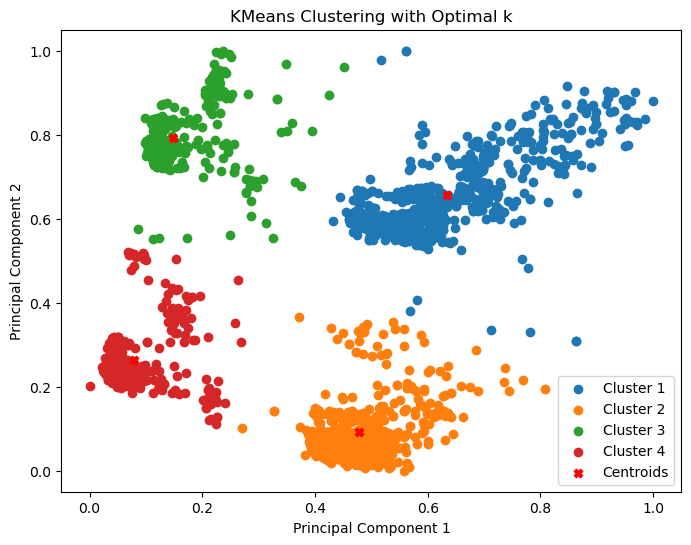

In [175]:
# Silhouette Score
# Specify the range of clusters (k) to try
k_values_silhouette = range(2, 10)

# List to store silhouette scores for each k
silhouette_scores = []

# Iterate over different values of k
for k_silhouette in k_values_silhouette:
    # Initialize KMeans model
    kmeans_silhouette = KMeans(n_clusters=k_silhouette, random_state=0, n_init=10)

    # Fit the model and obtain cluster labels
    cluster_labels_silhouette = kmeans_silhouette.fit_predict(pca_df_normalized_kmeans)

    # Calculate silhouette score
    silhouette_avg_silhouette = silhouette_score(pca_df_normalized_kmeans, cluster_labels_silhouette)
    silhouette_scores.append(silhouette_avg_silhouette)

# Plot the silhouette scores for each k
plt.plot(k_values_silhouette, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

# Print the optimal k for KMeans using Silhouette Score
optimal_k_kmeans_silhouette = np.argmax(silhouette_scores) + 2
print(f"Optimal k using Silhouette Method for KMeans: {optimal_k_kmeans_silhouette}")

# Assuming the necessary libraries are already imported

# Task 4: KMeans with Optimal k (using Silhouette Score)
# Use the optimal k obtained from the Silhouette Score
optimal_k_silhouette = optimal_k_kmeans_silhouette

# Initialize KMeans model with optimal k
kmeans_optimal_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=0, n_init=10)
kmeans_optimal_silhouette.fit(pca_df_normalized_kmeans)

# Add cluster labels to the normalized PCA DataFrame
pca_df_normalized_kmeans['Cluster'] = kmeans_optimal_silhouette.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k_silhouette):
    cluster_data = pca_df_normalized_kmeans[pca_df_normalized_kmeans['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans_optimal_silhouette.cluster_centers_[:, 0], kmeans_optimal_silhouette.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering with Optimal k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
#The optimal k we got by using the Silhouette Score is k=4, because it's where we get the maximum Silhouette Score.

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











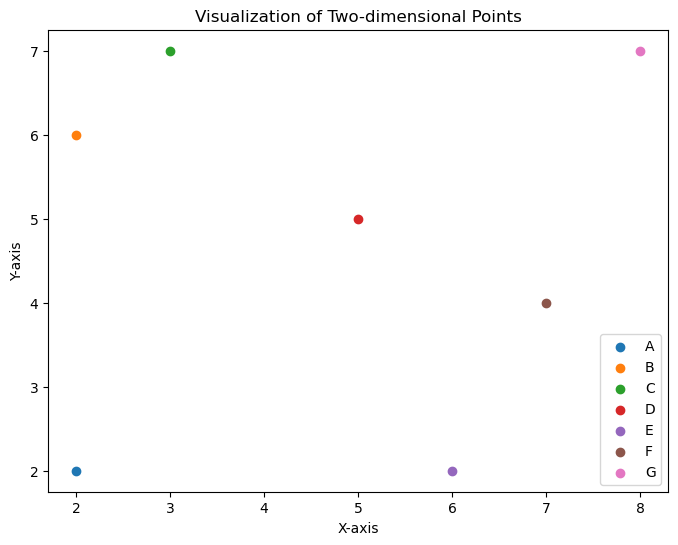

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


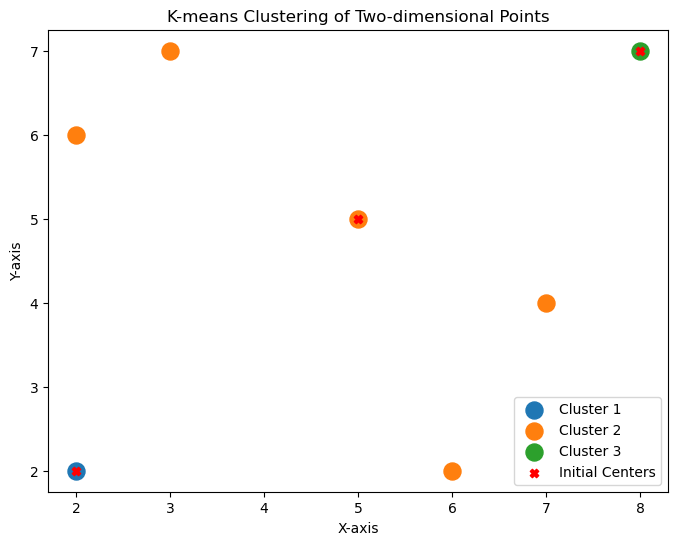

In [176]:
# Given two-dimensional points
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}
os.environ['OMP_NUM_THREADS'] = '1'
# Visualize the Data
plt.figure(figsize=(8, 6))
for point, coordinates in points.items():
    plt.scatter(coordinates[0], coordinates[1], label=point)

plt.title('Visualization of Two-dimensional Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


from sklearn.cluster import KMeans

# Convert points to a numpy array for KMeans
data = np.array(list(points.values()))

# K-means Clustering
# Arbitrarily choose three points as initial cluster centers (A, D, and G)
initial_centers = np.array([points['A'], points['D'], points['G']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=0)
kmeans.fit(data)

# Add cluster labels to the points
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_data = data[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}',s=150)

plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='X', label='Initial Centers')
plt.title('K-means Clustering of Two-dimensional Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**: 

# note: markings of the initial centers might block showing the coloring of a point .

Answer 1: The points grouped into clusters around the initial cluster centers (2,2), (5,5), and (8,7) in the final iteration.

Answer 2: Yes, when we choose different initial cluster centers it can lead to different final cluster sets. In the beginning, the algorithm converged to a solution where clusters were formed around (2,2), (5,5), and (8,7), but when we changed the initial cluster centers it lead to different final clusters. The reason is because K-means is sensitive to initial cluster centers, and different initial centers might lead to different local minimum results that do not represent the true global minimum.

Answer 3: K-means clustering can be useful in various real-world scenarios, such as: customer segmentation in marketing, image compression in computer vision, anomaly detection in cyber-security, and organizing documents in natural language processing.



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [177]:
# Projection of (1,3) onto 1 dimension: Vtranspose(first row)*v1 =  (1,2)*(1,3) = 7
#We have Used the corresponding EigenVector (1,2) with the first PC with eigen value 5. multiplied it by v1 = (1,3)

In [178]:
# Projection of (3,7) onto 1 dimension: Vtranspose(second row)*v2 =  (1,-1)*(3,7) = -4
#We have Used the corresponding EigenVector (1,-1) with the second PC with eigen value -1. multiplied it by v2 = (3,7)